In [123]:
import pandas_datareader.data as web
import quandl

from datetime import datetime as dt
import json

import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [116]:
def plot_series(series, labels = None, title = None, lw = 1, alpha = .7):
    
    if type(series) != list:
        
        plt.figure(figsize = (15, 6))
        plt.plot(series, label = labels, lw = lw)
        plt.legend()
        plt.title(title)
        plt.xticks(rotation = 45)
        plt.plot()
    
    else:
        
        plt.figure(figsize = (15, 6))
        
        if type(labels) != list:
            labels = [x for x in range(len(series))]
            
        for serie, label in zip(series, labels):
            
            plt.plot(serie, label = label, alpha = alpha, lw = lw)
        
        plt.xticks(rotation = 45)
        plt.legend()
        plt.title(title)
        plt.plot()

In [106]:
def get_bollinger(close):
    mean_20 = close.rolling(20).mean()
    upper = mean_20 + 2*close.rolling(20).std()
    lower = mean_20 - 2*close.rolling(20).std()
    return pd.DataFrame({'Close': close, 
                         'Upper': upper,
                         'Lower': lower,
                         'Rolling_mean_20': mean_20})

# Bollinger bands

In [8]:
# Define periods
def periods(start, end):
    start = start.split('-')
    end   = end.split('-')
    return dt(int(start[0]), int(start[1]), int(start[2])), dt(int(end[0]), int(end[1]), int(end[2]))

In [16]:
start, end = periods('2000-01-01', '2019-12-02')

In [120]:
goog = web.DataReader('GOOG', 'stooq', start, end).sort_index()
mtrx = web.DataReader('MTRX', 'stooq', start, end).sort_index()
fb   = web.DataReader('FB', 'stooq', start, end).sort_index()
tsla = web.DataReader('TSLA', 'stooq', start, end).sort_index()

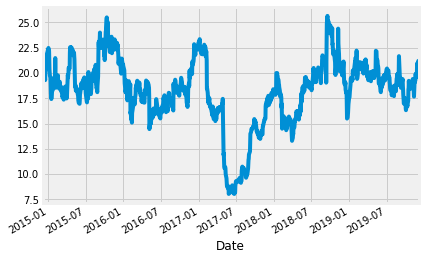

In [18]:
mtrx.Open.plot()

In [62]:
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-05,531.00,532.89,524.28,525.26,2557697
2014-12-08,527.13,531.00,523.79,526.98,2326833
2014-12-09,522.65,534.19,520.50,533.37,1871268
2014-12-10,532.96,536.33,525.56,526.06,1716785
2014-12-11,527.80,533.92,527.10,528.34,1610954


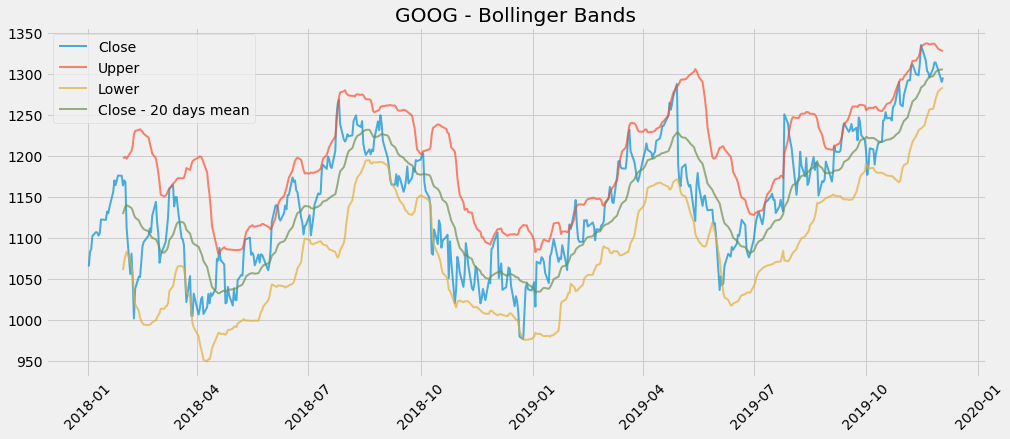

In [119]:
goog_bolling = get_bollinger(goog['2018':].Close)
goog_bolling
plot_series([goog_bolling[col] for col in goog_bolling.columns], 
            ['Close', 'Upper', 'Lower', 'Close - 20 days mean'], 'GOOG - Bollinger Bands', lw = 2)

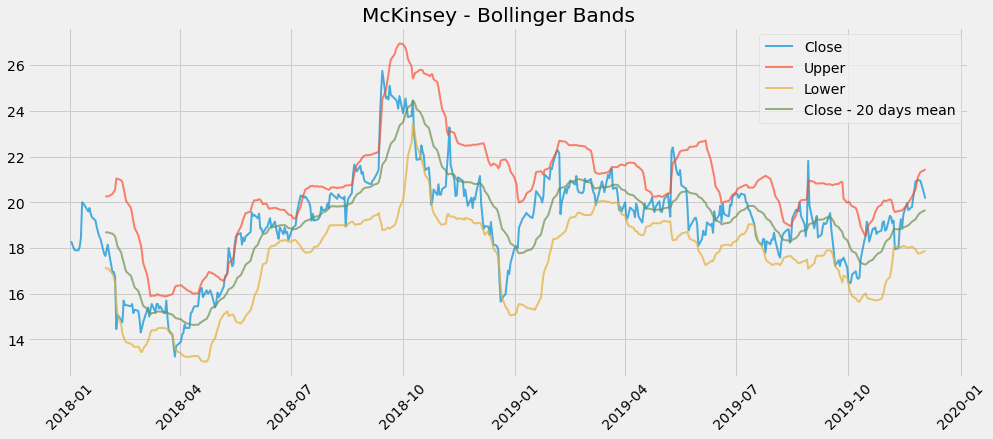

In [117]:
mtrx_bolling = get_bollinger(mtrx['2018':].Close)
mtrx_bolling
plot_series([mtrx_bolling[col] for col in mtrx_bolling.columns], 
            ['Close', 'Upper', 'Lower', 'Close - 20 days mean'], 'McKinsey - Bollinger Bands', lw = 2)

# Volatility

Volatility is how much price changes. It can be thought as a measure of stock variability or as a measure of risk.


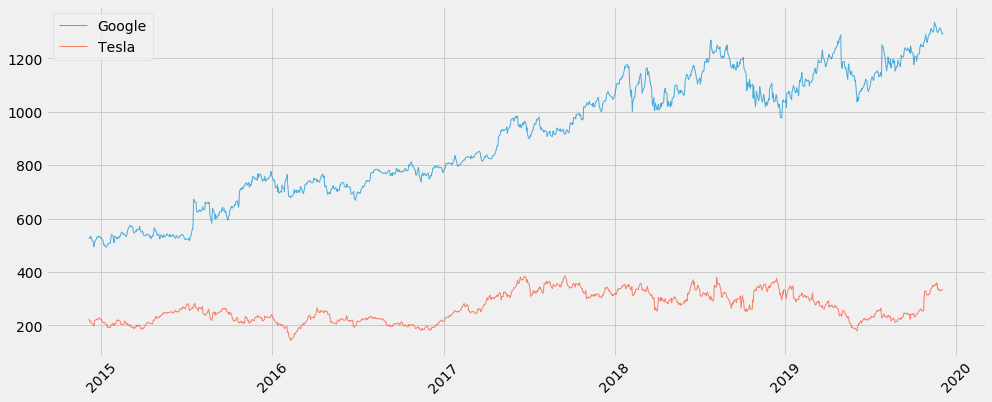

In [122]:
plot_series([goog.Close, tsla.Close], ['Google', 'Tesla'])

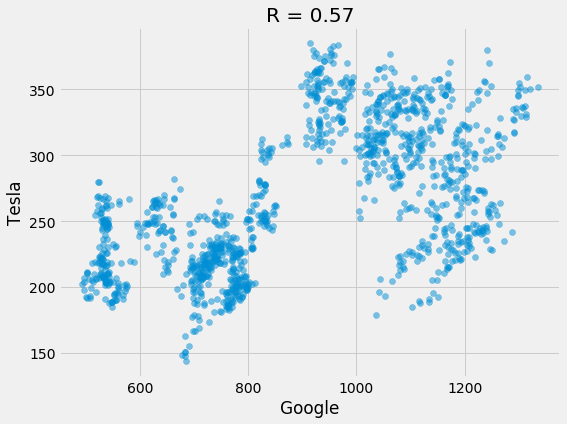

In [138]:
plt.figure(figsize = (8,6))
plt.scatter(goog.Close, tsla.Close, alpha = .5)
plt.xlabel('Google')
plt.ylabel('Tesla')
plt.title(f'R = {round(stats.pearsonr(goog.Close, tsla.Close)[0], 2)}')
plt.show()